In [7]:
# import packages
import pandas as pd
import tensorflow as tf
from early_stopping_util import EarlyStoppingCallback
from models import fashion_mnist_classifier
from image_utils import display_image,load_image
from model_util import save_model,load_model 
from reporting_utils import batch_predict,predict_single,predict_images_from_test_set

2.4.0


In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
model = fashion_mnist_classifier(optimizer='adam', loss='sparse_categorical_crossentropy')
# model fitting
history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=100,
        callbacks=[EarlyStoppingCallback()],
    )

Epoch 1/100
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6213 - accuracy: 0.7828 - val_loss: 0.4236 - val_accuracy: 0.8473
0.8246666789054871
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3890 - accuracy: 0.8627 - val_loss: 0.3905 - val_accuracy: 0.8615
0.8660333156585693
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3438 - accuracy: 0.8740 - val_loss: 0.3761 - val_accuracy: 0.8640
0.8761000037193298
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3093 - accuracy: 0.8861 - val_loss: 0.3592 - val_accuracy: 0.8649
0.8854833245277405
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2979 - accuracy: 0.8903 - val_loss: 0.3361 - val_accuracy: 0.8793
0.8902166485786438
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.8959 - val_loss: 0.3797 - val_accuracy: 0.8595
0.8967499732971191
Epoch 7/100
187

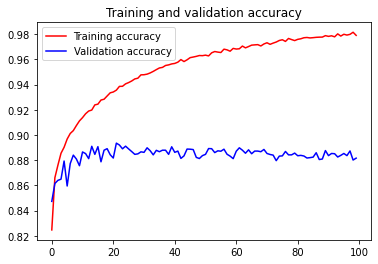

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=1)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7463 - accuracy: 0.8816

Test accuracy: 0.881600022315979


In [19]:
save_model(model,'./models/multi_class_image_classifier')

INFO:tensorflow:Assets written to: ./models/multi_class_image_classifier/assets


'Dress'

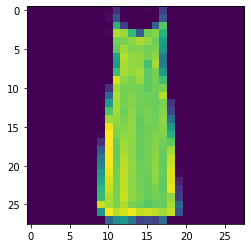

In [20]:
predict_images_from_test_set(model,x_test,class_names,13)

'Sandal'

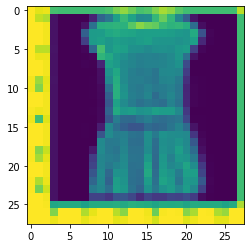

In [21]:

path = '/Users/prashunjaveri/Desktop/dress_1.jpeg'
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
correct_predictions = pd.DataFrame({ 'predictions': [3]  })
model = load_model('./models/multi_class_image_classifier')
image_shape = (28,28,1)
predict_single(path=path,
               model=model,
               shape=(28,28,1), 
               classes=class_names, 
               show_image=True,
               grey_scale=True )

In [22]:
path = '/Users/prashunjaveri/Desktop/fashion_mnist'
batch_predict(path=path,
            model=model,
            shape=image_shape,
            classes=class_names,
            correct_predictions=correct_predictions,
            show_all = False ,
            grey_scale=True,
            show_correct = False)

{'errors': [{'file': 'dress_1.jpeg',
   'predictions': 5,
   'predicted_labels': 'Sandal',
   'expected': 3,
   'expected_labels': 'Dress'}],
 'percentage_error': 100.0}